### Predicting the Likelihood of a Completed Purchase Using Classification model

In retail, predicting the likelihood that a customer will complete a purchase is crucial for optimizing sales strategies, managing inventory, and personalizing customer experiences. Given a dataset of product sales, customer demographics, and promotional campaigns, the task is to predict whether a transaction will result in a completed purchase (binary outcome: Yes/No). The goal is to develop classification models that estimate the probability of a customer completing their order based on various features, such as product pricing, customer demographics, and promotional offers. 

**Problem Statement**

Develop various classification models that predict the likelihood of a purchase being completed, given the customer and product features.  

The task is to predict the likelihood that a transaction will result in a completed purchase based on features such as: 

- Customer ID: A unique identifier for each customer. 

- Age: The customer's age, which could influence buying patterns. 

- Gender: The gender of the customer (Male/Female). 

- Loyalty Member: Whether the customer is a member of the loyalty program (Yes/No), which could indicate higher engagement or likelihood to complete a purchase. 

- Product Type: The category or type of product purchased (e.g., Electronics, Apparel), which might correlate with purchase completion rates. 

- SKU: Unique identifier for the product (Stock Keeping Unit). 

- Rating: The average product rating (1-5), which could influence the customer's decision to complete the purchase. 

- Order Status: Indicates whether the order was completed, pending, or canceled. For this model, the target will be whether the order was completed (Yes/No). 

- Payment Method: The method of payment used (e.g., Credit Card, PayPal), which may influence the probability of a transaction being completed. 

- Unit Price: The price per unit of the product, as higher-priced items may have lower conversion rates. 

- Quantity: The number of units purchased in the order. 

- Purchase Date: The date when the purchase was made, which might capture time-related patterns in purchase behavior. 

- Shipping Type: The shipping method chosen by the customer (e.g., Standard, Expedited), which could be linked to the likelihood of completing the order. 

- Add-ons Purchased: Whether the customer bought additional items (e.g., accessories, warranties) along with the main product (Yes/No). 

- Add-on Total: The total cost of any add-ons purchased, which contributes to the final price and may influence purchase completion. 

**The goal is to predict the probability that a customer will complete a transaction, which will be modelled as a binary outcome:** 

**Approach Overview:**

- Data Preprocessing: 

Clean the data, handling missing values, encoding categorical variables, and ensuring that only completed orders are used in the target variable. 

Create a binary target variable: 1 for completed orders, 0 for non-completed orders. 

- Feature Engineering: 

Engineer features from the raw data, such as creating binary variables for Add-ons Purchased or Loyalty Member status. 

Normalize or scale continuous features like Unit Price and Quantity if necessary. 

- Model Training: 

Split the dataset into training and testing sets. 

Train the classification models on the training data to predict the binary outcome of purchase completion. 

- Model Evaluation: 

Use metrics such as accuracy, precision, recall, and AUC-ROC to evaluate model performance. 

- Prediction: 

Use the trained classification models to predict the likelihood of purchase completion for future transactions. 

- Conclusion:  

Choose the best model based on efficiency in solving the business problem##

<a id="lib"></a>
# Import Libraries

In [5]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [6]:
# set the plot size using 'rcParams'
plt.rcParams['figure.figsize'] = [15,8]

### Task 1: Load the dataset and perform preliminary EDA (Exploratory Data Analysis) with key observations and insights- (weightage - 20 marks) (AE) 

<a id="prep"></a>
### Data Preparation

#### T1.1 Load the Sales dataset. (weightage - 2 marks)

In [7]:
# load the csv file
def read_dataset (data): 
   # code starts here
  df_sales = pd.read_csv("retail_sales.csv")
  return df_sales
   # code ends here
path = "retail_sales.csv"
df_sales = read_dataset(path)
df_sales.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Order Status
0,1000,53,Male,No,Smartphone,SKU1004,2,Credit Card,5538.330000,791.190000,7,20-03-2024,Standard,"Accessory,Accessory,Accessory",40.210000,Cancelled
1,1000,53,Male,No,Tablet,SKU1002,3,Paypal,741.090000,247.030000,3,20-04-2024,Overnight,Impulse Item,26.090000,Completed
2,1002,41,Male,No,Laptop,SKU1005,3,Credit Card,1855.840000,463.960000,4,17-10-2023,Express,NaN,0.000000,Completed
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Cash,3164.760000,791.190000,4,08-09-2024,Overnight,"Impulse Item,Impulse Item",60.160000,Completed
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Cash,41.500000,20.750000,2,21-05-2024,Express,Accessory,35.560000,Completed


#### T1.2  Check the shape and data types. (weightage - 1 mark)  

In [8]:
# use 'shape' to check the dimension of data
def df_shape(df_sales):
    # code starts here 
    df_shape = df_sales.shape

    return df_shape
    # code ends here
df_shape = df_shape(df_sales)
print(df_shape)    

(20000, 16)


<a id="dtype"></a>
#### Check the Data Type

In [9]:
# use 'dtypes' to check the data type of a variable
# use 'shape' to check the dimension of data
def df_dtypes(df_sales):
    # code starts here
    df_type = df_sales.dtypes 
    return df_type
    # code ends here
df_dtypes = df_dtypes(df_sales)
print(df_dtypes)    


Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
Order Status          object
dtype: object


#### T1.3  Remove the given variables namely, Customer ID, SKU ,Purchase Date and Unit Price (weightage - 2 marks)

In [10]:
# drop the column using drop()
def drop_columns(df_sales) : 
    cols = ['Customer ID', 'SKU','Purchase Date','Unit Price']
    # code starts here
    drop_columns = df_sales.drop(columns = cols)
    return drop_columns
    # code ends here
df_sales = drop_columns(df_sales)
df_sales.head()

,Age,Gender,Loyalty Member,Product Type,Rating,Payment Method,Total Price,Quantity,Shipping Type,Add-ons Purchased,Add-on Total,Order Status
0,53,Male,No,Smartphone,2,Credit Card,5538.330000,7,Standard,"Accessory,Accessory,Accessory",40.210000,Cancelled
1,53,Male,No,Tablet,3,Paypal,741.090000,3,Overnight,Impulse Item,26.090000,Completed
2,41,Male,No,Laptop,3,Credit Card,1855.840000,4,Express,NaN,0.000000,Completed
3,41,Male,Yes,Smartphone,2,Cash,3164.760000,4,Overnight,"Impulse Item,Impulse Item",60.160000,Completed
4,75,Male,Yes,Smartphone,5,Cash,41.500000,2,Express,Accessory,35.560000,Completed


#### T1.4  Draw box plots to check for outliers for numeric variables, namely: Age, Rating, Total Price, Quantity and Add-on Total  

- Run ‘describe’ function to get the descriptive statistics of the aforementioned variables (weightage - 3 marks)

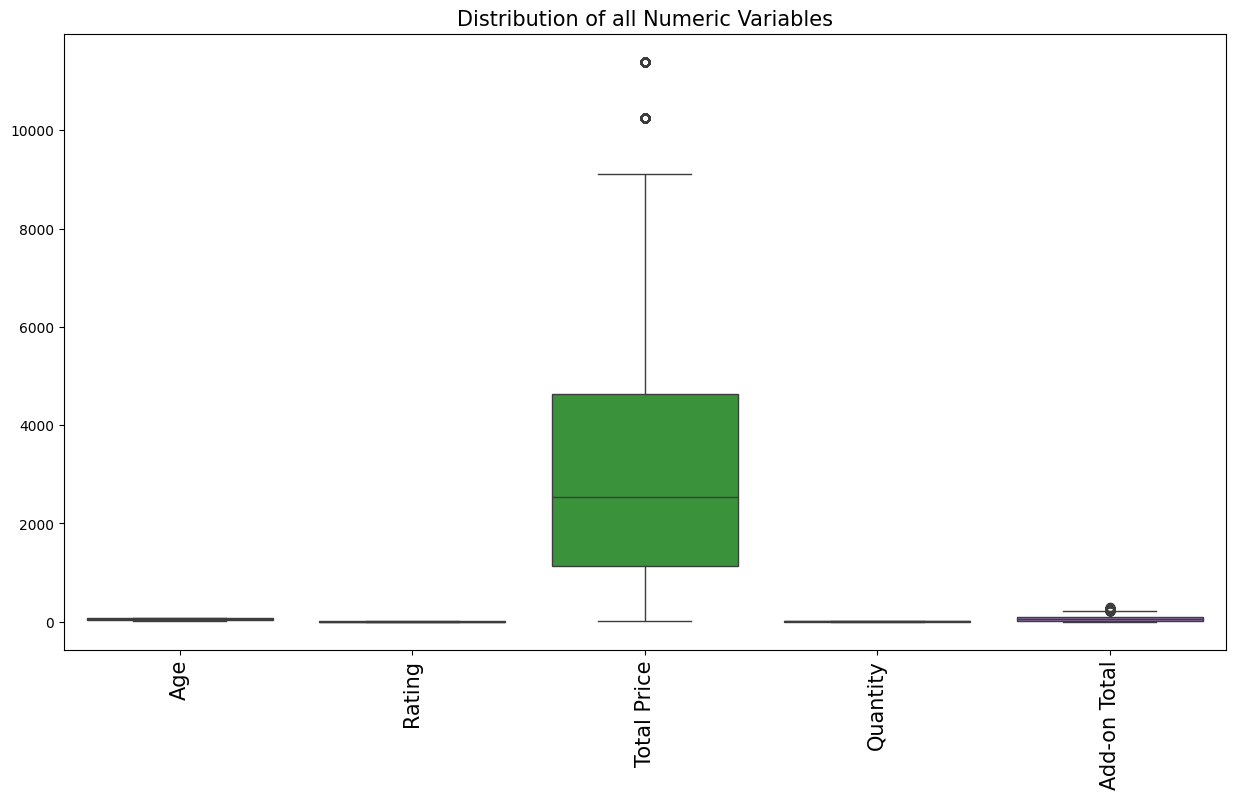

In [11]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
def outlier_treatment (df_sales) : 
    plt.figure(figsize = (15,8))

    # code starts here
    # plot a boxplot to visualize the outliers in all the numeric variables
    col_check = ['Age', 'Rating', 'Total Price', 'Quantity', 'Add-on Total']
    
    # code ends here
    sns.boxplot(df_sales[col_check])
    
    # set plot label
    # set text size using 'fontsize'
    plt.title('Distribution of all Numeric Variables', fontsize = 15)

    # xticks() returns the x-axis ticks
    # 'rotation = vertical' rotates the x-axis labels vertically
    plt.xticks(rotation = 'vertical', fontsize = 15)

    # display the plot
    plt.show()

outlier_treatment (df_sales)


In [12]:
def transpose_1(df_sales): 
    # code starts here
    # add transpose() method
    df_transpose = df_sales.describe().transpose()
    
    return df_transpose
    # code ends here
trans_1 = transpose_1(df_sales)
trans_1

,count,mean,std,min,25%,50%,75%,max
Age,20000.000000,48.994100,18.038745,18.000000,33.000000,49.000000,65.000000,80.000000
Rating,20000.000000,3.093950,1.223764,1.000000,2.000000,3.000000,4.000000,5.000000
Total Price,20000.000000,3180.133419,2544.978675,20.750000,1139.680000,2534.490000,4639.600000,11396.800000
Quantity,20000.000000,5.485550,2.870854,1.000000,3.000000,5.000000,8.000000,10.000000
Add-on Total,20000.000000,62.244848,58.058431,0.000000,7.615000,51.700000,93.842500,292.770000


#### T1.5  Do outlier treatment. Take lower and upper bound based on Quartiles and 1.5 times IQR and then cap the outliers with the lower bound and upper bound values. (weightage - 6 marks)

In [13]:
# Outlier treatment function
def treat_outliers_iqr(df, columns):
    """
    Treats outliers in specified columns of a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names to treat outliers in.

    Returns:
        pd.DataFrame: The DataFrame with outliers treated.
    """
    df_treated = df.copy()

    # code starts here
    # use for loop
    for col in columns:
        Q1 = df_treated[col].quantile(0.25)
        Q3 = df_treated[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_treated[col][(df_treated[col]<lower_bound) | (df_treated[col] > upper_bound)] = df_treated[col].median()
        
    
    return df_treated
    # code ends here
    
columns_to_treat = df_sales.select_dtypes(include='number').columns
df_treated = treat_outliers_iqr(df_sales, columns_to_treat)
df_treated.head()

,Age,Gender,Loyalty Member,Product Type,Rating,Payment Method,Total Price,Quantity,Shipping Type,Add-ons Purchased,Add-on Total,Order Status
0,53,Male,No,Smartphone,2,Credit Card,5538.330000,7,Standard,"Accessory,Accessory,Accessory",40.210000,Cancelled
1,53,Male,No,Tablet,3,Paypal,741.090000,3,Overnight,Impulse Item,26.090000,Completed
2,41,Male,No,Laptop,3,Credit Card,1855.840000,4,Express,NaN,0.000000,Completed
3,41,Male,Yes,Smartphone,2,Cash,3164.760000,4,Overnight,"Impulse Item,Impulse Item",60.160000,Completed
4,75,Male,Yes,Smartphone,5,Cash,41.500000,2,Express,Accessory,35.560000,Completed


#### T1.6  Run the ‘describe’ function on the treated data and note down the variables for which the ‘max’ value has now changed post the outlier treatment (weightage - 2 marks)  


In [14]:
def transpose_2(df_treated): 
    
    # code starts here
    df_treated = df_treated.describe().transpose()

    
    return df_treated

    # code ends here
trans_2 = transpose_2(df_sales)
trans_2


,count,mean,std,min,25%,50%,75%,max
Age,20000.000000,48.994100,18.038745,18.000000,33.000000,49.000000,65.000000,80.000000
Rating,20000.000000,3.093950,1.223764,1.000000,2.000000,3.000000,4.000000,5.000000
Total Price,20000.000000,3180.133419,2544.978675,20.750000,1139.680000,2534.490000,4639.600000,11396.800000
Quantity,20000.000000,5.485550,2.870854,1.000000,3.000000,5.000000,8.000000,10.000000
Add-on Total,20000.000000,62.244848,58.058431,0.000000,7.615000,51.700000,93.842500,292.770000


#### T1.7  Find the missing values. Note down the number of missing values for variable ‘Gender’ (weightage - 2 marks)

In [15]:
def missing_value (df_treated):
    # code starts here
    #  arrange sum of missing values in descending order
    missing = df_treated.isnull().sum().sort_values(ascending=False)

    
     
    return missing
    # code ends here

missing_value (df_treated)

Add-ons Purchased    4868
Gender                  1
Loyalty Member          0
Age                     0
Product Type            0
Rating                  0
Total Price             0
Payment Method          0
Quantity                0
Shipping Type           0
Add-on Total            0
Order Status            0
dtype: int64

#### T1.8  Drop the rows in which ‘Gender’ has missing values, recheck for missing values and note down the variable(s) that still has missing values (weightage - 2 marks)

In [16]:
def remove_value(df_treated):
    # code starts here
    #Removing missing value row by Gender 
    df_cleaned = df_treated.dropna(subset = "Gender")

    # Check sum of missing values in the data (arrange in descending order)
    missing_after_gender_drop = df_cleaned.isnull().sum().sort_values(ascending = False)
     
    return missing_after_gender_drop
    # code ends here
remove_value(df_treated)

Add-ons Purchased    4867
Age                     0
Loyalty Member          0
Gender                  0
Product Type            0
Rating                  0
Total Price             0
Payment Method          0
Quantity                0
Shipping Type           0
Add-on Total            0
Order Status            0
dtype: int64

### Task 2: Carry out extensive data preparation and feature engineering (weightage - 15 marks) (ME) 

####  T2.1  Do further univariate and multivariate analysis and convert the target variable into 0 and 1. (weightage -5 marks)  


- Note: Add 'Unit Price' variable and proceed with analysis.

Add Unit Price Variable
               Age       Rating  Total Price     Quantity  Add-on Total  \
count 20000.000000 20000.000000 20000.000000 20000.000000  20000.000000   
mean     48.994100     3.093950  3020.848254     5.485550     59.872059   
std      18.038745     1.223764  2307.827468     2.870854     54.389967   
min      18.000000     1.000000    20.750000     1.000000      0.000000   
25%      33.000000     2.000000  1139.680000     3.000000      7.615000   
50%      49.000000     3.000000  2534.490000     5.000000     51.700000   
75%      65.000000     4.000000  4558.720000     8.000000     91.520000   
max      80.000000     5.000000  9117.440000    10.000000    223.180000   

        Unit Price  Order_Completed  
count 20000.000000     20000.000000  
mean    561.918216         0.671600  
std     305.077464         0.469643  
min      20.750000         0.000000  
25%     361.180000         0.000000  
50%     463.960000         1.000000  
75%     791.190000         1.00000

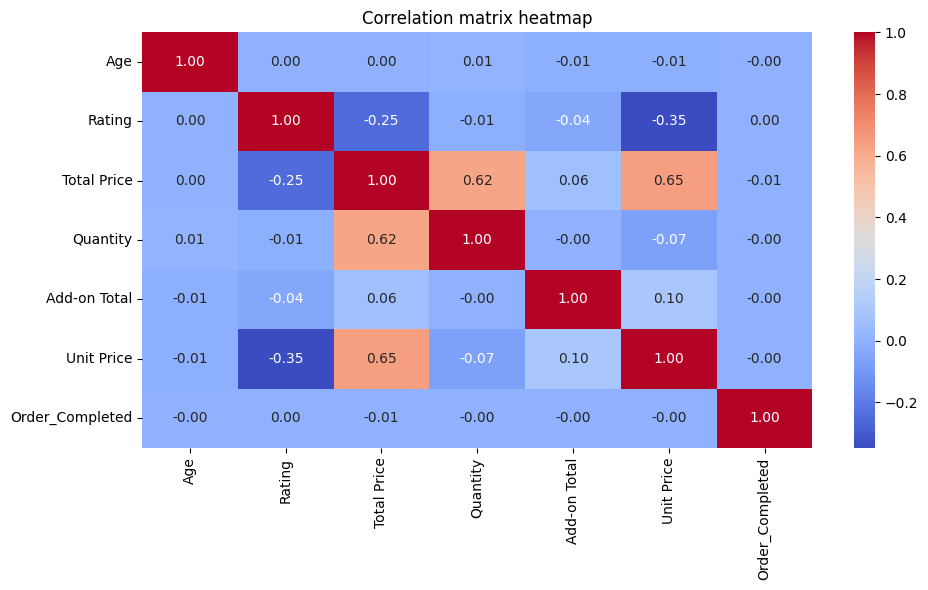

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [17]:
def variable_analysis(df_treated):
    df = df_treated.copy()

    
    # Add 'Unit Price' variable and proceed with analysis.
    if 'Total Price' in df.columns and 'Quantity' in df.columns:
        df['Unit Price'] = df.apply(lambda row: row['Total Price']/row['Quantity'] if row['Quantity'] != 0 else 0, axis = 1)
        print("Add Unit Price Variable")
    else:
        raise ValueError("Missing Total Price or Quantity Columns")

    # Convert Target variable into 0 and 1
    if 'Order Status' in df.columns:
        df['Order_Completed'] = df['Order Status'].apply(lambda x: 1 if str(x).strip().lower() == 'completed' else 0)
    else:
        raise ValueError("Missing Order Status Column")

    # perform univariate analysis
    print(df.describe())

    # perform multivariate analysis - corelation matrix
    numeric_col = df.select_dtypes(include = 'number').columns
    corr_matrix = df[numeric_col].corr()

    # plot heatmap
    plt.figure(figsize = (10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation matrix heatmap")
    plt.tight_layout()
    plt.show()
      
    return df

variable_analysis = variable_analysis(df_treated)
print(variable_analysis)

#### T2.2  Split the dataset into train and test.  (weightage -3 marks)  

In [18]:
# Define X, y and encode categorical variables
X = variable_analysis.drop(columns=['Order_Completed'], axis=1)
y = variable_analysis['Order_Completed']

# Create dummies for categorical columns
X = pd.get_dummies(X, drop_first=True)

#### T2.3  Create dummy variables and scale the numerical features (weightage-7 marks) 


#### Label Encoding,One hot encoding and scaling


In [19]:
# -------------------------------
# STEP 2: Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# -------------------------------
# STEP 3: Scale numeric features
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Task 3: Build and evaluate the models (weightage - 40 marks)  (ME)

#### T3.1  Build classification models (Logistic Regression, Decision Tree, Random Forest and at least two Boosting models is the minimum) (weightage-20 marks)

In [20]:
# -------------------------------
# STEP 4: Build and Evaluate Models
# -------------------------------
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

for name, model in models.items():
    print(f"\n Model: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



 Model: Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC: 1.0
Confusion Matrix:
 [[1310    0]
 [   0 2690]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1310
           1       1.00      1.00      1.00      2690

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


 Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC: 1.0
Confusion Matrix:
 [[1310    0]
 [   0 2690]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1310
           1       1.00      1.00      1.00      2690

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


 Model: Random Forest
Accuracy: 1.0
Precision

#### T3.2  Check for the model evaluation parameters and do fine-tuning when necessary to make models free of errors (weightage-20 marks)

In [71]:
# STEP 1: Drop columns highly correlated with target
corr_matrix = variable_analysis.corr()
high_corr_cols = corr_matrix['Order_Completed'][(corr_matrix['Order_Completed'].abs() > 0.99) & (corr_matrix['Order_Completed'].abs() < 1)].index.tolist()
variable_analysis_clean = variable_analysis.drop(columns=high_corr_cols)

# STEP 2: Split into features and target
X = variable_analysis_clean.drop(columns=['Order_Completed'])
y = variable_analysis_clean['Order_Completed']

# STEP 3: Handle only numeric columns
X = pd.get_dummies(X, drop_first=True)
X = X.select_dtypes(include=np.number)

# STEP 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n🔹 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# STEP 6: Train and evaluate models

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
evaluate_model("Logistic Regression", lr, X_test_scaled, y_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
evaluate_model("Decision Tree", dt, X_test_scaled, y_test)

# Random Forest with tuning
rf_params = {'n_estimators': [100], 'max_depth': [5, None], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_
evaluate_model("Random Forest (Tuned)", best_rf, X_test_scaled, y_test)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
evaluate_model("Gradient Boosting", gb, X_test_scaled, y_test)

# AdaBoost
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train_scaled, y_train)
evaluate_model("AdaBoost", ab, X_test_scaled, y_test)


ValueError: could not convert string to float: 'Male'

### Task 4: Summarize the findings of the analysis and draw conclusions with PPT / PDF. (weightage - 25 marks) (ME)   

#### Final Submission guidelines:    

- Download the Jupyter notebook in the format of html.    

- Upload it in the lumen (UNext LMS)   

- Summarized PPT/ PDF prepared in Task 4 to be uploaded in the lumen (UNext LMS) and it must contain why and how the best model was selected. 